In [1]:
# Load libs:
import pandas as pd  
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import moment
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import gc as gc
import scipy.stats as stats
from matplotlib.patches import Ellipse
from scipy.sparse import hstack

/Users/ddi/python_venv/cnn/cnn/cnn-venv/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
class raw_data_gen(object):
    
    
    """
    A paranet class to generate a raw data from normal distribution.
    Further statistical analysis is to be performed.
    
    ...

    Attributes
    ----------
    mu : float
        mean value of the normal distribution
    sigma : float
        standard deviation of the normal distribution
    n : int
        number of data points

    Methods
    -------
    display_nfo():
        Prints the parameters of the distribution
    plot_xyz():
        Plots notrmalized histograms to pdf for x, y and z.
        x is the generated distribution. y and z are shifted as:
        y = x + 1 and z = x + 5, respectively.
    """
    
    
    __slots__ = ['avr','var','num','x','y','z']
    
    def __init__(self, mu:float, sigma:float, n:int) -> None:
        
        #Sanity check(s):
        if (mu is None) or (sigma is None) or (n is None):
            raise TypeError('Invalid type for <<mu>> and/or <<n>>, and/or <<sigma>>. Accepted numeric values, not None.')
        
        self.avr = float(mu)
        self.var = float(sigma)
        self.num = int(n)
        
        valx = np.random.normal(self.avr, self.var, self.num)
        valy = valx + 1
        valz = valx + 5
        
        self.x = valx
        self.y = valy
        self.z = valz
        
    def display_nfo(self):
        print('\nMean value:\n', self.avr, 
              '\nStandard deviation:\n', self.var,
             ' \nNumber of data points:\n', self.num)
        
    def plot_xyz(self):
        plt.figure()
        countx, binsx, ignoredx = plt.hist(self.x, 100, density = True, color = 'r')
        county, binsy, ignoredy = plt.hist(self.y, 100, density = True, color = 'g')
        countz, binsz, ignoredz = plt.hist(self.z, 100, density = True, color = 'b')
        plt.xlabel('x,y,z')
        plt.ylabel('Density')
        plt.title('Normalized histograms')
        
    
class pd_convert(raw_data_gen):
    
    
    """
    A child class to generate Pandas Data Frame from the class
    raw_data_gen() and the original raw data. Inherits the parent 
    class’s methods and attributes.
    
    ...

    Attributes
    ----------
    mu : float
        mean value of the normal distribution
    sigma : float
        standard deviation of the normal distribution
    n : int
        number of data points

    Methods
    -------
    pd_convert(mu, sigma, n).df:
        Returns the Pandas Data Frame
    """
    
    
    __slots__ = ['df']
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.df = pd.DataFrame({'x': self.x, 'y': self.y, 'z': self.z})

        
class stat_test(object):
    
    """
    A class to perform Statistical analysis with the
    already generated data.
    
    ...

    Attributes
    ----------
    df : n-dimensional array
        Pandas Data Frame
    self.df_anova: n-dimensional array
        Pandas Data Frame for ANOVA with unequal variances on
        significance level alpha = 0.05
    self.obj_tukey: obj
        Object containing all prerequisites for post-hoc analysis
        via Tukey HSD  on significance level alpha = 0.05

    Methods
    -------
    summary_anova():
        Prints the results of ANOVA
    summary_tukey():
        Prints the results of Tukey HSD
    """
    
    
    __slots__ = ['df_anova','obj_tukey']
    
    def __init__(self, pd_df:pd.DataFrame) -> None:
        
        self.df_anova = pd.DataFrame({'score_xyz': pd.concat([pd_df.iloc[:,0],
                                                   pd_df.iloc[:,1],
                                                   pd_df.iloc[:,2]]),
                                     
                                      'group_xyz': np.repeat(['Group-1',
                                                              'Group-2',
                                                              'Group-3'], 
                                                            
                                      repeats = len(pd_df.iloc[:,0]))})
        
        self.obj_tukey = pairwise_tukeyhsd(endog = self.df_anova['score_xyz'],
                                           groups = self.df_anova['group_xyz'],
                                           alpha = 0.05)    
        
    def summary_anova(self):  
        print('ANOVA results for x, y and z:\n\n', 
              pg.welch_anova(dv = 'score_xyz', 
                             between = 'group_xyz', 
                             data = self.df_anova))        
    
    def summary_tukey(self):
        print('Post hoc for Intensity ah:\n\n', self.obj_tukey) 

In [3]:
data_raw = raw_data_gen(mu=0, sigma=1, n=10000)

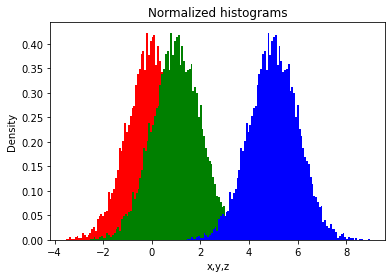

In [4]:
data_raw.plot_xyz()

In [5]:
data_df = pd_convert(mu = 0, sigma = 1, n = 10000).df

In [6]:
# Statistics:
print('Descriptive statistics for x:\n\n', data_df['x'].describe())
print('\n\nDescriptive statistics for y:\n\n', data_df['y'].describe())
print('\n\nDescriptive statistics for z:\n\n', data_df['z'].describe())

Descriptive statistics for x:

 count    10000.000000
mean        -0.000302
std          0.997132
min         -3.916083
25%         -0.658597
50%          0.004239
75%          0.675058
max          3.475979
Name: x, dtype: float64


Descriptive statistics for y:

 count    10000.000000
mean         0.999698
std          0.997132
min         -2.916083
25%          0.341403
50%          1.004239
75%          1.675058
max          4.475979
Name: y, dtype: float64


Descriptive statistics for z:

 count    10000.000000
mean         4.999698
std          0.997132
min          1.083917
25%          4.341403
50%          5.004239
75%          5.675058
max          8.475979
Name: z, dtype: float64


In [7]:
tests = stat_test(data_df)

In [8]:
tests.summary_anova()

ANOVA results for x, y and z:

       Source  ddof1    ddof2             F  p-unc       np2
0  group_xyz      2  19998.0  70400.941805    0.0  0.824377


In [9]:
tests.summary_tukey()

Post hoc for Intensity ah:

 Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1  group2 meandiff p-adj lower  upper  reject
---------------------------------------------------
Group-1 Group-2      1.0  -0.0 0.9669 1.0331   True
Group-1 Group-3      5.0  -0.0 4.9669 5.0331   True
Group-2 Group-3      4.0  -0.0 3.9669 4.0331   True
---------------------------------------------------


In [10]:
gc.collect()

20528